In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [100]:
df = pd.read_table('WabashRiver_DailyDischarge_20150317-20160324.txt', 
                 delimiter='\t', #delimiter
                 header=None, 
                 skiprows=26) #skipping rows up to 26 rows
df.head()

,0,1,2,3,4,5
0,USGS,3335500,2015-03-17 00:00,EST,23200,P
1,USGS,3335500,2015-03-17 00:15,EST,23100,P
2,USGS,3335500,2015-03-17 00:30,EST,23100,P
3,USGS,3335500,2015-03-17 00:45,EST,23100,P
4,USGS,3335500,2015-03-17 01:00,EST,23100,P


In [101]:
# Making the column name
df.columns=['USGS','3','date','timezone','discharge(cfs)','P'] #column 6 cfs = cubic feet second
df.head()

,USGS,3,date,timezone,discharge(cfs),P
0,USGS,3335500,2015-03-17 00:00,EST,23200,P
1,USGS,3335500,2015-03-17 00:15,EST,23100,P
2,USGS,3335500,2015-03-17 00:30,EST,23100,P
3,USGS,3335500,2015-03-17 00:45,EST,23100,P
4,USGS,3335500,2015-03-17 01:00,EST,23100,P


In [102]:
#Use Columns 3 and 4 for a single Datetime element
df['datetime']=pd.to_datetime(df['date']+''+df['timezone'])
df.index=df['datetime']

In [103]:
#Dropping 
df=df.drop(columns=['USGS','3','date','timezone','P', 'datetime'])
df.head()

,discharge(cfs)
datetime,
2015-03-17 00:00:00-04:00,23200
2015-03-17 00:15:00-04:00,23100
2015-03-17 00:30:00-04:00,23100
2015-03-17 00:45:00-04:00,23100
2015-03-17 01:00:00-04:00,23100


# Create a plot of daily average streamflow for the period of record, written to a PDF or PS file.

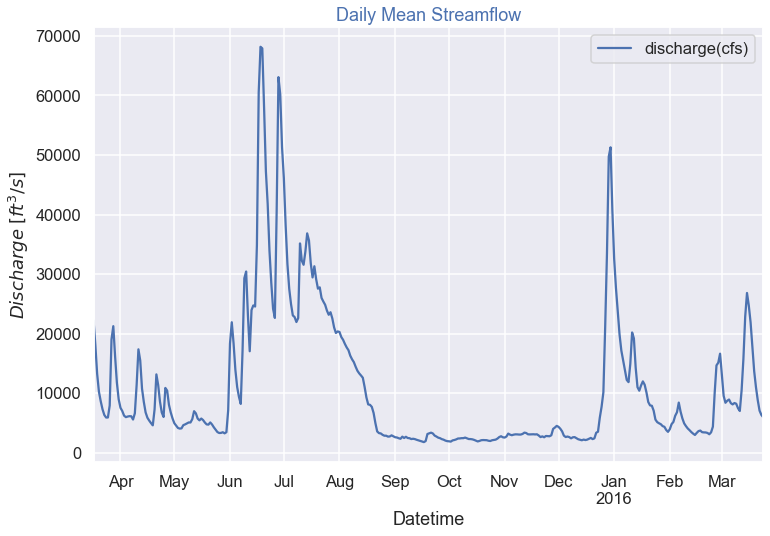

In [124]:
sns.set(style='darkgrid', color_codes=True, context='talk') #using seaborn for better aesthetic and easy to read graph
# Plotting daily mean streamflow
fig1=df.resample('D').mean().plot(figsize=(12,8))
#fig1.plot(figsize=(12,8))
plt.title('Daily Mean Streamflow', size=18, c='b')
plt.xlabel('Date')
plt.ylabel( r'$Discharge\;[ft^3/s]$')
plt.savefig('Daily_Average_Streamflow.pdf')

# Using the daily average flow data, identify and plot the 10 days with highest flow, written to a PDF or PS file. 
Use symbols to represent the data on the same time axis used for the full daily flow record.

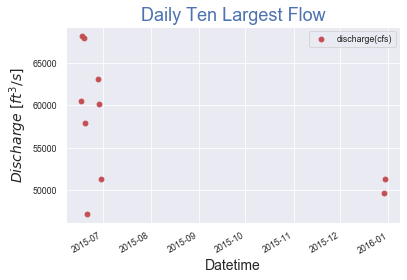

In [126]:
sns.set(style='darkgrid', color_codes=True, context='paper') #seaborn context= paper for smaller text
#sorting 10 days with highest flow, using resample mean and sort values
fig2 = df.resample('D').mean().sort_values(by='discharge(cfs)', ascending=False).head(10).plot(style="ro").plot(figsize=(10,8))
plt.title('Daily Ten Largest Flow', size=18, c='b')
plt.xlabel('Date', size=14)
plt.ylabel( r'$Discharge\;[ft^3/s]$', size=14)
plt.savefig('Daily_10-Largest_Flow.pdf')

# plot of monthly average streamflow for the period of record, 
written to a PDF or PS file

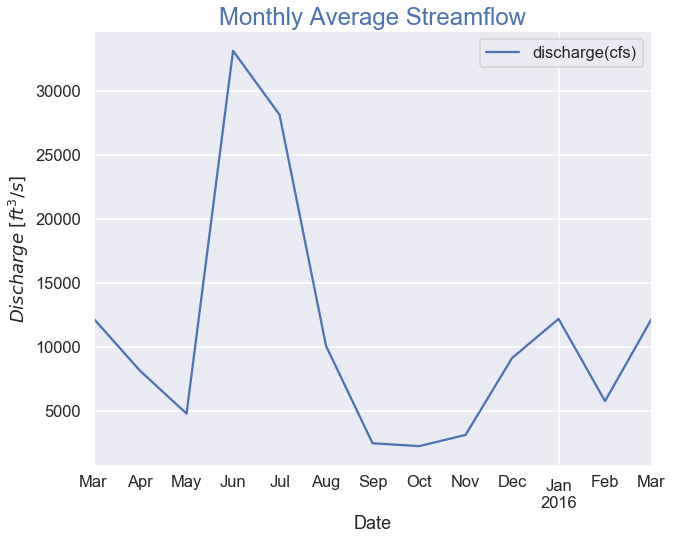

In [138]:
sns.set(style='darkgrid', context='talk')
#monthly average using resample'M' for monthly
fig3 = df.resample('M').mean().plot(figsize=(10,8))
plt.title('Monthly Average Streamflow', size=24, c='b')
plt.xlabel('Date', size=18)
plt.ylabel( r'$Discharge\;[ft^3/s]$', size=18)
plt.savefig('Monthly_Average_Streamflow.pdf')